1.3799999952316284
50.02000045776367


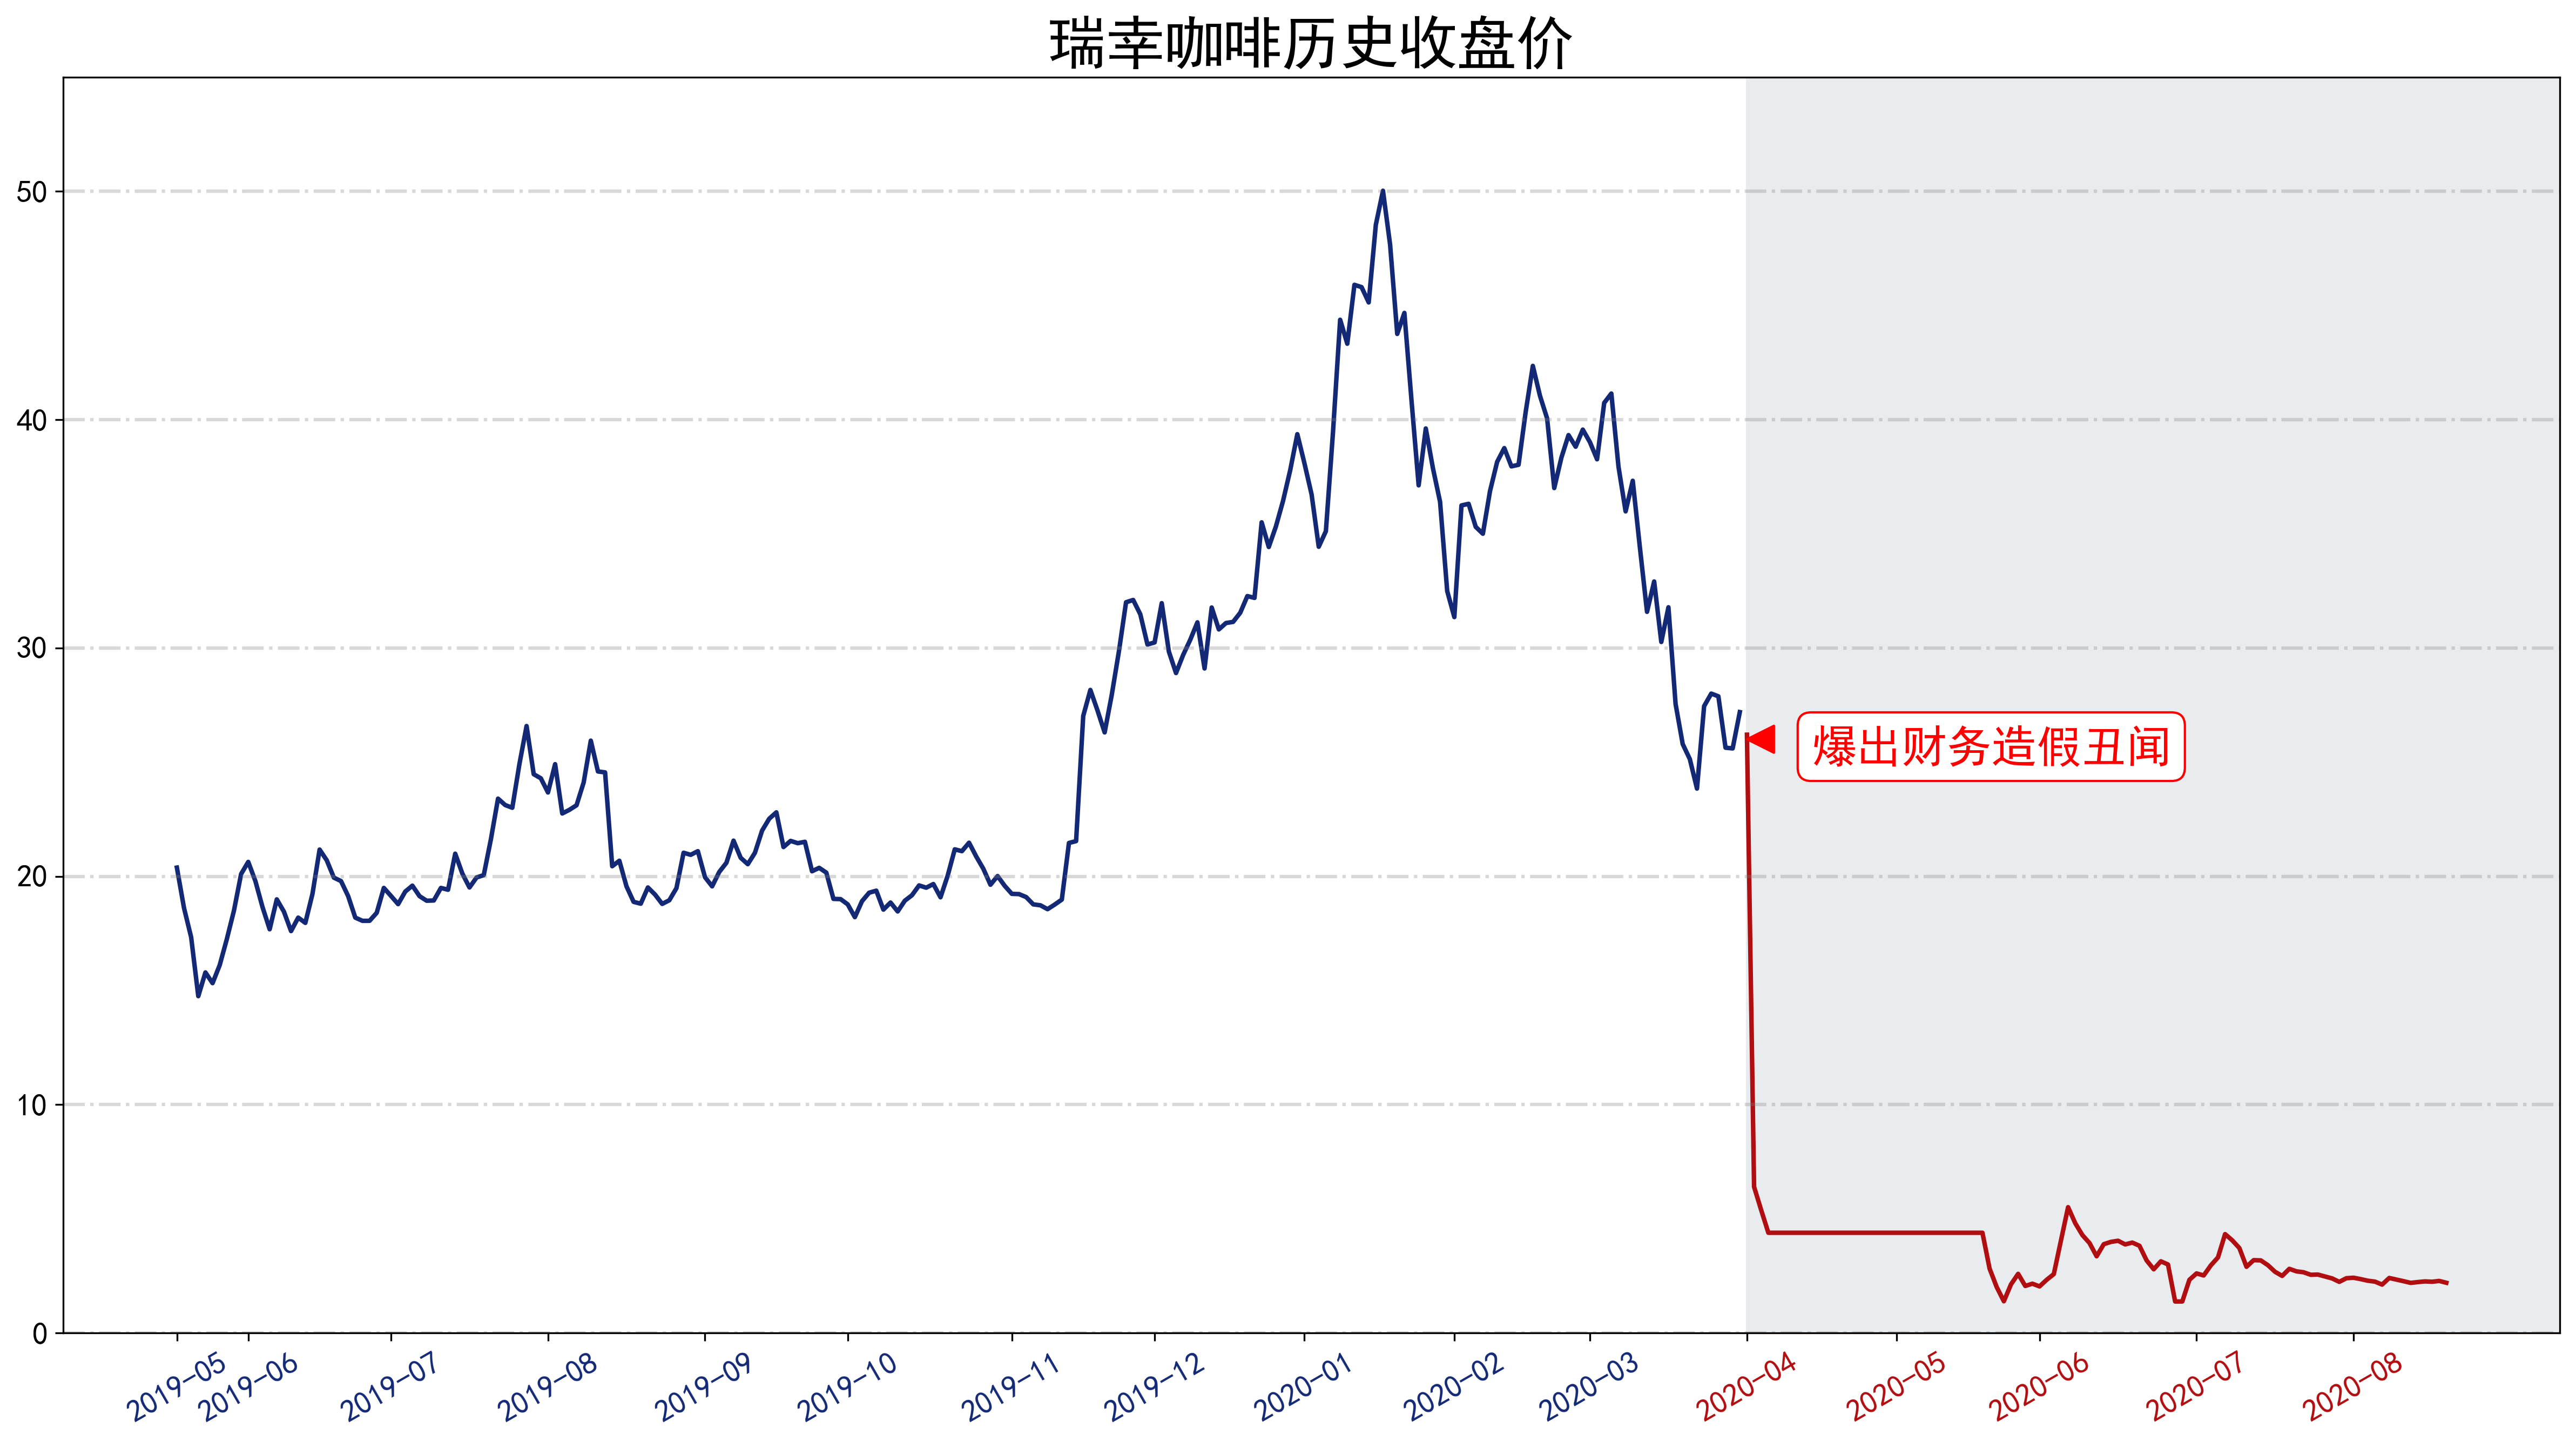

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#导入数据
lk= pd.read_csv("C:\mypython\datasets\stock-LK.csv",encoding='utf-8')

# 自上市以来 收盘价最低、最高点
print(np.min(lk['Close']))
print(np.max(lk['Close']))
# 将时间转换成 xxxx-xx形式
lk['Ymnth']=lk['Date'].apply(lambda x : x[:7])

# 以2020-04-01为界限区分财务造假新闻爆出前后的股价走势
before=lk[lk['Date']<'2020-04-01']
after=lk[lk['Date']>='2020-04-01']

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi= 300)
ax.plot(before['Date'], before['Close'], color='#142975',lw=2)
ax.plot(after['Date'], after['Close'], color='#B00E11',lw=2)

#y轴刻度和标签设置
ax.set_ylim(0,55)
ax.set_yticklabels(labels=range(0,61,10),fontsize=14,fontweight='medium')
for y in range(0,55,10):
    plt.axhline(y=y,color='gray',linestyle='dashdot',alpha=0.3)

#首先按照年份分组，选取每年最小的日期作为刻度 ['2014-01-02', '2015-01-02', '2016-01-04',..\
#虽然不同年份股票交易日数量有轻微差别，但是体现在x轴刻度上的视觉差别基本可以忽略
xticks=lk[['Date','Ymnth']].groupby(lk['Ymnth']).agg('min')['Date'].tolist()  
ax.set_xticks(xticks)
xtick_color= [ '#142975' if x <'2020-04-01' else '#B00E11' for x in xticks ]

#然后刻度标签设置为 上述列表中每个刻度的前四位  ['2014', '2015', '2016',...
ax.set_xticklabels([x[:7] for x in xticks ], rotation=30,fontsize=14)
# 根据时间分割线，设置不同的刻度标签颜色
[t.set_color(i) for (i,t) in zip(xtick_color,ax.xaxis.get_ticklabels())]

# 文本标注
box = {
  'facecolor'  : 'white',
  'edgecolor' : 'red',
  'boxstyle'    : 'round'
}
ax.text('2020-04-15',25,"爆出财务造假丑闻",bbox=box,color='red',fontsize=20)

# 箭头指向文本  文本此物为空格. 4月1日估价为26块多
plt.annotate(' ',
ha = 'center', va = 'bottom',
xytext = ('2020-04-07', 26),
xy = ('2020-04-01', 26),
arrowprops = {'color':'red'})

#给红色部分加上灰色阴影
start=before.shape[0]
offset=after.shape[0]+50
shape = patches.Rectangle((start,-5),offset,60,color = '#E9ECEF')
plt.gca().add_patch(shape)

plt.title("瑞幸咖啡历史收盘价",fontsize=26)

fig.tight_layout()
plt.savefig(r"C:\Users\勤奋的大眼仔\Desktop\VISUAL\my_pictures\stock_lk4.png")

plt.show()
plt.close()